# **Advanced Lane Finding** 
***
## Overview
The goals / steps of this project are the following:  

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply the distortion correction to the raw image.  
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view"). 
* Detect lane pixels and fit to find lane boundary.
* Determine curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

## Final Result
The final pipleline has been successfully applied in both [project video](https://youtu.be/VA8V-RgZ7Jo) and [challenge video](https://youtu.be/JNfJ-Rtege4).  


## Camera Calibration
Using the calibration chessboard images provided in the repository, we successfully obtained the camera matrix and distortion coefficientss by leveraging fuctions like cv2.findChessboardCorners, cv2.calibrateCamera from OpencCV library.   

After camera matrix and distortion matrix are obained, we stored them in a pickle file so that we can quickly retreive them later on without having to calculate them afresh every time we use them to undistort images.




Class Calibrarte in file calibrate.py implemented camera calibration feature, the main external interface is the Calibrarte::undistort method

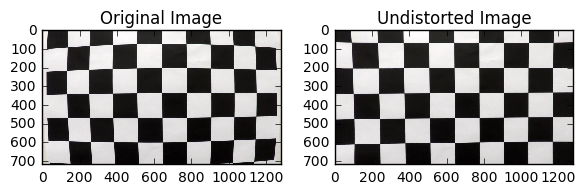

In [1]:
from calibrate import Calibrarte

obj= Calibrarte()
obj.run()

## Pipeline (single images)
1. Distortion correction  
Distortion correction has been correctly applied to each test image, as demonstrated in below image.
2. Thresholding  
Various thresholding are exlored to identify pixles that are likely to be lane pixels, including x graident, y gradient, gradient, gradient direction, H and S channel in HLS color space. At the end H channel and x gradient thresholding is combined to perform thresholding. Note that ROI mask is also used to acheive best result.  
Below is the thresholding result performed on all test images. The right most images are the final image we will use to feed into next step in the pipeline.   

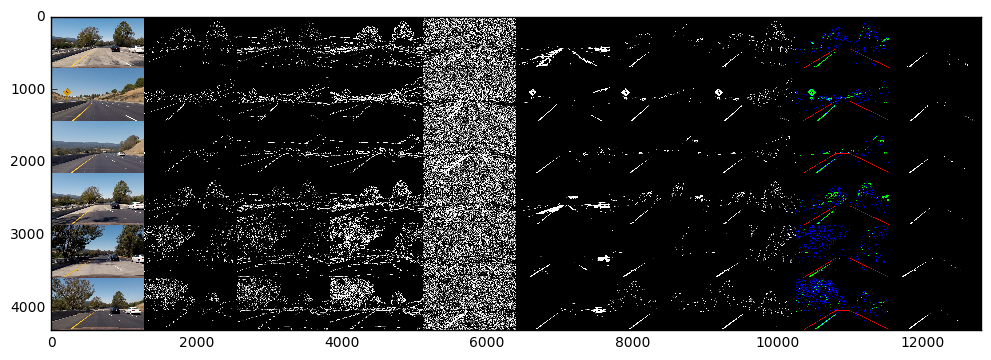

In [8]:
from threshold import Threshold
import matplotlib.pyplot as plt
obj= Threshold()
fnames = ['./test_images/test1.jpg','./test_images/test2.jpg','./test_images/test3.jpg','./test_images/test4.jpg',
          './test_images/test5.jpg','./test_images/test6.jpg']
plt.figure(figsize=(12,24))
obj.test_thresholds(fnames)

3.Perspective transform  
cv2.getPerspectiveTransform and cv2.warpPerspective APIs from opencv library are used to perform perspective transform on the thresholded image.

Class BirdViewTransform in file birdview.py implemented this feature, the main external interface is the BirdViewTransform::bird_view method.  
Below is the result:  


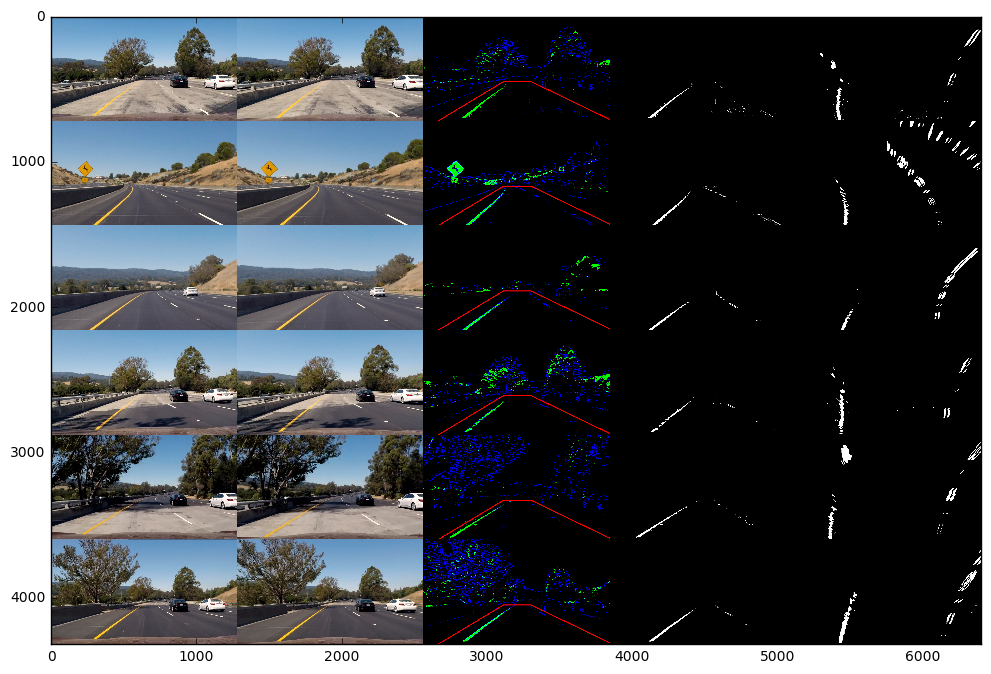

In [4]:
from birdview import BirdViewTransform
plt.figure(figsize=(12,12))
obj= BirdViewTransform()
obj.run()

4.Lane pixels identification and ploynominial fit  
To identify lane pixels, we perform below steps:  
 1)  get the histogram of pixel distrition over y direction for the lower half part of the image  
 2)  found the two peaks in the histogram  
 3)  use small sliding windows to identify lane pixels from bottom to top  
After all the lane pixles for left and right lanes are identified, we use np.fit over y to get the polynominal fit for the lane line.  
Below image demonstrated above operations.

adjust sliding windows
Radius of Curvature is 5621m
Vehicle is 0.00m left of center
Radius of Curvature is 14006m
Vehicle is 0.15m left of center
Radius of Curvature is 13366m
Vehicle is 0.06m left of center
adjust sliding windows
adjust sliding windows
Radius of Curvature is 5805m
Vehicle is 0.05m left of center
adjust sliding windows
Radius of Curvature is 3246m
Vehicle is 0.18m right of center
Radius of Curvature is 3233m
Vehicle is 0.00m left of center


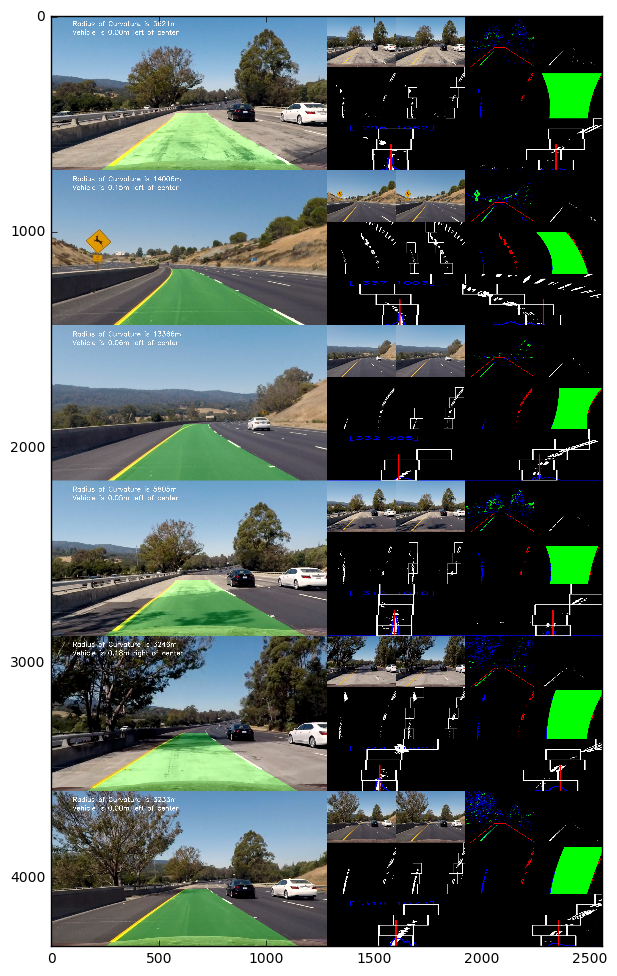

In [9]:
from measurecurvature import MeasueCurvature
plt.figure(figsize=(12,12))
obj= MeasueCurvature()
obj.run()

5.Curvature and vehicle position calculation   
With the left/right lane lines being fit, we compute the curvature at the bottom of the image, as well as the vehicle postion relative to lane center. The resultant information is displayed in the image as texts. This is demostrated in the image in step 4  
Class MeasueCurvature in file measurecurvature.py implemented this feature, the main interface is the MeasueCurvature::__cal_curvature method.  
6.Warp back to original image space   
Finally we wrap back the identifeid lane area in birdviw back to original image space by using cv2.warpPerspective API.  This is demonstrated in the image in step 4 as well.  
Class MeasueCurvature in file measurecurvature.py implemented this feature, the main interface is the MeasueCurvature::map_back_road method.  

## Pipeline (video)
1. Resultant video  
After much tweaks over the pipeline steps and relevant hyper parameters, the final pipleline is able to successfuly locate lane lines in the [project video](https://youtu.be/VA8V-RgZ7Jo) and [challenge video](https://youtu.be/JNfJ-Rtege4).  

2. Frame tracking  
 To handle some challening frames, we implement frame tracking mechanism and leverage previous frames lane line information to help identify current frame's lane lines. Specifially below information from previous frames are tracked and utilized.   
 1) Use identifed lane area in last frame as current frame's region of interest mask in thresholdig step.   
This techniques has been found very useful to exclude misleading pixels, especially in the challenge video.  
 2) Use fit lane line in last frame as current frame's starting search point when locating lane line pixels  
 3) Reuse last frame lane line if we can't find lane line for current frame.   
This is a bit risky if lane lines can't be identified for several frame in sequence. Empirically this tick works well for the project video and challenge video.  

3. Fresh search in the first few images  
At the begginning, we have no previous frame to rely upon, so we need to search lane line from ground up. Also, the pipeline needs to be aware if it's confident about its last lane line identification, if not, we need to search from groud up as well.

Frame tracking mechanism is mainly implmented in file frametracking.py file.


## Reflection  
A good lane-finding algorithm must be robust to changing light conditions, weather conditions, curvature of the road, type of road, and other vehicles on the road, and etc. 
The  pipeline algorithm described above works well on the project video and challenge video, but much crecdit must be given to various process/paramter tweaks targetting these two videos. In this sense, this project really inspires me to learn more and find out how a reliable lane finding solution used in real life can be implemented.